In [67]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [68]:
# files = [
#     './bronze/IMG_3083.JPG',
#     './bronze/IMG_3084.JPG',
#     './bronze/IMG_3085.JPG',
#     './bronze/IMG_3086.JPG',
#     './bronze/IMG_3087.JPG',
#     './bronze/IMG_3088.JPG',
#     './bronze/IMG_3089.JPG',
#     './bronze/IMG_3090.JPG',
#     './bronze/IMG_3091.JPG',
#     './bronze/IMG_3092.JPG',
#     './bronze/IMG_3093.JPG',
#     './bronze/IMG_3094.JPG',
#     './bronze/IMG_3095.JPG',
#     './bronze/IMG_3096.JPG',
#     './bronze/IMG_3097.JPG',
#     './bronze/IMG_3098.JPG'
# ]


In [69]:
# bugs = [cv2.imread(f, 1) for f in files]

In [70]:
# def relight_image(image, light_color):

#     # Konwertuj obraz na przestrzeń kolorów LAB (Lightness, A, B)
#     lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

#     # Podziel obraz na poszczególne kanały
#     l_channel, a_channel, b_channel = cv2.split(lab_image)

#     # Modyfikacja kanału L (jasność) dla relightingu
#     # Przyjmij, że zmiana kanału L o wartość dodatnią odpowiada za żółtawe światło
#     l_channel += light_color

#     # Połącz zmodyfikowane kanały w obraz LAB
#     modified_lab_image = cv2.merge((l_channel, a_channel, b_channel))

#     # Przekonwertuj zmodyfikowany obraz LAB z powrotem do przestrzeni kolorów BGR
#     modified_image = cv2.cvtColor(modified_lab_image, cv2.COLOR_LAB2BGR)

In [71]:
# def compute_lighting_map(input_image, target_image):
#     # Obliczanie różnicy między obrazami docelowymi i wejściowymi
#     diff_image = cv2.absdiff(input_image, target_image)
#     # Przetwarzanie różnicy na mapę oświetlenia
#     lighting_map = cv2.cvtColor(diff_image, cv2.COLOR_BGR2GRAY)
#     return lighting_map

# def relight_image(input_image, lighting_map):
#     # Normalizacja mapy oświetlenia
#     normalized_map = lighting_map.astype(float) / 255.0
#     # Aplikowanie mapy oświetlenia do obrazu wejściowego
#     relighted_image = np.clip((input_image.astype(float) + normalized_map * 50), 0, 255).astype(np.uint8)
#     return relighted_image

In [77]:
def relight_object(input_images):
    # Initialize an empty array to store the accumulated lighting information
    lighting_map = np.zeros_like(input_images[0], dtype=np.float32)
    relighted_object = np.zeros_like(input_images[0], dtype=np.float32)

    # Accumulate lighting information from each input image
    for img in input_images:
        # Convert the input image to grayscale
        for channel in range(3):
            # Normalize the grayscale image
            normalized_img = img[channel].astype(float) / 255.0
            # Accumulate the normalized image
            lighting_map[channel] += normalized_img # Add a new axis for broadcasting

    # Average the accumulated lighting information
    lighting_map /= len(input_images)

    # Apply the accumulated lighting map to relight the object
    relighted_object = np.clip((input_images[-1].astype(float) + lighting_map * 50), 0, 255).astype(np.uint8)

    return relighted_object

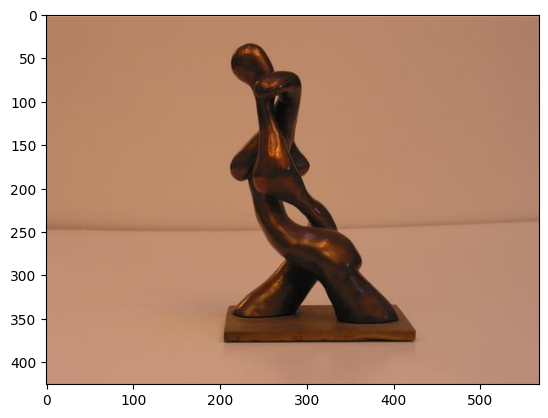

In [79]:
input_images = [cv2.imread(f'./bronze/IMG_{i}.JPG') for i in range(3083, 3099)]
relighted_object = relight_object(input_images)
plt.imshow(cv2.cvtColor(relighted_object,cv2.COLOR_BGR2RGB))
plt.show()